In [6]:
import numpy as np
from particle_swarm import PSO
from objective_function import ObjectiveFunction, get_bounds, get_crf

In [2]:
bounds = get_bounds(
    nb_hours=3840,
    pd_min=120,
    pd_max=1650,
    pv_min=10,
    pv_max=100,
    e_ess_min=10,
    e_ess_max=100,
    e_sf_min=10,
    e_sf_max=100,
)

In [3]:
pv_interest_rate = .03 # value of interest rate for PV panels on average
pv_lifespan = 25 # PV panels lifespan range from 25 to 30 years
crf_pv = get_crf(pv_interest_rate, pv_lifespan)

ess_interest_rate = .05
ess_lifespan = 15 # lifespan of lifepo4 (Lithium Iron Phosphate) batteries range from 10 to 20 years
crf_ess = get_crf(ess_interest_rate, ess_lifespan)

sf_interest_rate = .08
sf_lifespan = 20 # lifespan of lifepo4 (Lithium Iron Phosphate) batteries range from 10 to 20 years
crf_sf = get_crf(sf_interest_rate, sf_lifespan)


print(f"SF CRF: {crf_sf:.4f}")
print(f"PV CRF: {crf_pv:.4f}")
print(f"ESS CRF: {crf_ess:.4f}")

SF CRF: 0.1019
PV CRF: 0.0574
ESS CRF: 0.0963


In [4]:
obj_fn = ObjectiveFunction(
    a=0.246,
    b=0.0845,
    p_d_rated=500,
    fuel_price=0.709,
    c_capital_pv=1000,
    c_replacement_pv=500,
    crf_pv=crf_pv,
    c_capital_ess=2000,
    c_replacement_ess=1000,
    crf_ess=crf_ess,
    crf_sf=crf_sf,
    c_capital_sf=1800,
    c_replacement_sf=900,
    em_fuel=2.3,  # emission factor for CO2 on average
)

In [7]:
load = np.random.uniform(100, 3000, 3840)

In [8]:
pso = PSO(
    n_particles=100, max_iters=10, objective_function=obj_fn, bounds=bounds, load=None
)
print(pso)

PSO Algorithm:
	Number of particles: 100
	Maximum Number of Iterations: 10
	solution Space dimension: 3843
	Objective: Minimize

	Particles: 
		|Particle 1:	Initial Fitness: 3035290.145620728	 Initial Position: [1149.2282 ... 10.5693]
		|Particle 2:	Initial Fitness: 2988063.67137219	 Initial Position: [448.9014 ... 18.3895]
		|Particle 3:	Initial Fitness: 3039395.087057358	 Initial Position: [699.2149 ... 88.9492]
		|Particle 4:	Initial Fitness: 3063218.9592152406	 Initial Position: [782.8865 ... 46.0597]
		|Particle 5:	Initial Fitness: 3044001.0012389934	 Initial Position: [946.5449 ... 54.5458]
		|Particle 6:	Initial Fitness: 3041551.776871286	 Initial Position: [627.6035 ... 86.7468]
		|Particle 7:	Initial Fitness: 3054795.3801385625	 Initial Position: [1365.4580 ... 82.2758]
		|Particle 8:	Initial Fitness: 3012417.1744876774	 Initial Position: [400.9227 ... 15.2056]
		|Particle 9:	Initial Fitness: 3027413.0299610943	 Initial Position: [233.7118 ... 15.9989]
		|Particle 10:	Initial 

In [9]:
%%time
# c1 -> how much the the particle's own decision affect its overal decision
# c2 -> how much the other particles affect the current particle decision
pso.run(w = .5, c1 = 1, c2 = 1)

Executing PSO algorithm
Number of particles: 	100
Number of Iterations: 	10
w:	0.5
c1:	1
c2:	1


	Step 0/10:	 gbest: [448.90...1292.41...18.39] fitness: 2988063.67
	Step 1/10:	 gbest: [120.00...1495.67...10.00] fitness: 2946311.08
	Step 2/10:	 gbest: [120.00...1642.37...10.00] fitness: 2926117.01
	Step 3/10:	 gbest: [120.00...1650.00...10.00] fitness: 2916936.33
	Step 4/10:	 gbest: [120.00...1650.00...10.00] fitness: 2907719.70
	Step 5/10:	 gbest: [120.00...1650.00...10.00] fitness: 2906016.35
	Step 6/10:	 gbest: [120.00...1650.00...10.00] fitness: 2903916.22
	Step 7/10:	 gbest: [120.00...1650.00...10.00] fitness: 2896431.57
	Step 8/10:	 gbest: [120.00...1650.00...10.00] fitness: 2893182.33
	Step 9/10:	 gbest: [120.00...1650.00...10.00] fitness: 2892894.44

PSO run finished.
CPU times: user 96.3 ms, sys: 0 ns, total: 96.3 ms
Wall time: 95.3 ms


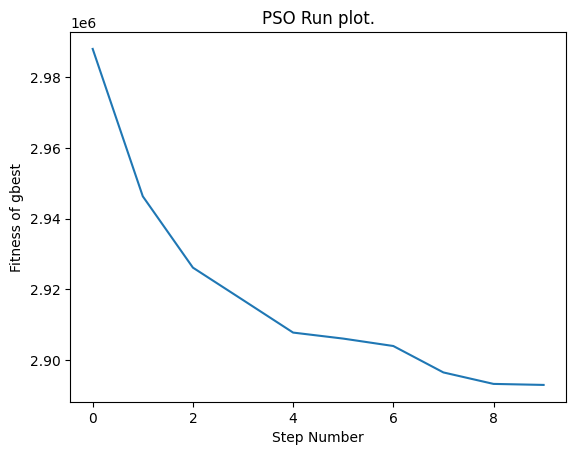

In [10]:
pso.plot_run()

In [11]:
pso.results()

PSO Run Results:

	Optimal PV size: 12.14		 Interval: [10.00,100.00]
	Optimal ESS Capacity: 10.00	 Interval: [10.00,100.00]
	Optimal SF Capacity: 10.00	 Interval: [10.00,100.00]
	Optimal values for PD: 		Interval: [120.00,1650.00]

		 PD_1: 120.0000
		 PD_2: 120.0000
		 PD_3: 120.0000
		 PD_4: 1650.0000
		 PD_5: 1650.0000
		 PD_6: 120.0000
		 PD_7: 120.0000
		 PD_8: 1650.0000
		 PD_9: 120.0000
		 PD_10: 120.0000
		 PD_11: 120.0000
		 PD_12: 120.0000
		 PD_13: 120.0000
		 PD_14: 120.0000
		 PD_15: 120.0000
		 PD_16: 1650.0000
		 PD_17: 1650.0000
		 PD_18: 120.0000
		 PD_19: 120.0000
		 PD_20: 120.0000
		 PD_21: 120.0000
		 PD_22: 120.0000
		 PD_23: 120.0000
		 PD_24: 120.0000
		 PD_25: 120.0000
		 PD_26: 120.0000
		 PD_27: 1650.0000
		 PD_28: 1650.0000
		 PD_29: 120.0000
		 PD_30: 1650.0000
		 PD_31: 1650.0000
		 PD_32: 120.0000
		 PD_33: 120.0000
		 PD_34: 1650.0000
		 PD_35: 1650.0000
		 PD_36: 1650.0000
		 PD_37: 1650.0000
		 PD_38: 120.0000
		 PD_39: 1650.0000
		 PD_40: 1650.0000
		

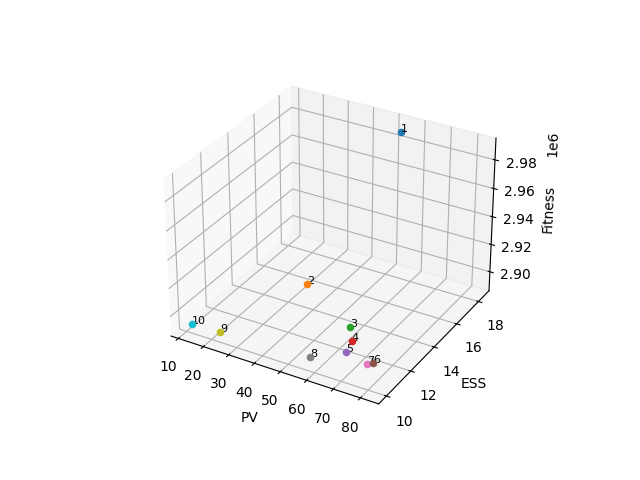

In [12]:
%matplotlib widget
pso.plot_particle_movement(particle_idx="gbest")